## Pair Programming Visualización I

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.
Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import matplotlib.colors as mcolors

In [32]:
df_ataques = pd.read_csv("../Panda/2. datos_sincolumnas.csv")
df_ataques.head(2)

,Case Number,Unnamed: 0,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Time,Species,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...


In [44]:
columnas_min = {col:col.lower().replace(" ","_") for col in df_ataques.columns}
df_ataques.rename(columns = columnas_min, inplace=True)

In [45]:
df_ataques.drop(["Unnamed: 0"], axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [35]:
df_p=pd.DataFrame(df_ataques["sex_"].value_counts()).reset_index()
df_p.head()

KeyError: 'sex_'

In [36]:
df_p.rename(columns={"sex_":"cantidad"},inplace=True)
df_p.head()

,index,cantidad
0,M,4939
1,F,619
2,M,2
3,N,2
4,lli,1


In [37]:
df_p.columns

Index(['index', 'cantidad'], dtype='object')

In [13]:
x= df_p["index"]
y = df_p["cantidad"]

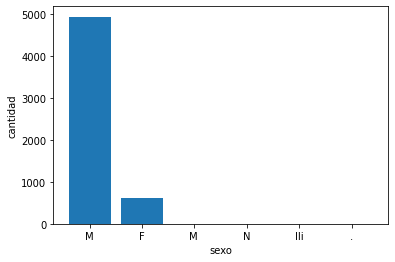

In [38]:
plt.figure()
plt.bar(x , y)
plt.xlabel("sexo")
plt.ylabel("cantidad")
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación

In [39]:
df_ataques.isnull().sum()

Case Number       1
Year              0
Type              4
Country          40
Area            408
Location        488
Activity        511
Name            200
Sex             550
Age            2666
Time           3180
Species        2705
href              0
dtype: int64

In [40]:
df_nulos= pd.DataFrame(df_ataques.isnull().sum()).reset_index()
df_nulos.head()

,index,0
0,Case Number,1
1,Year,0
2,Type,4
3,Country,40
4,Area,408


In [41]:
df_nulos.rename(columns={0:"cantidad"},inplace=True)
df_nulos.head()

,index,cantidad
0,Case Number,1
1,Year,0
2,Type,4
3,Country,40
4,Area,408


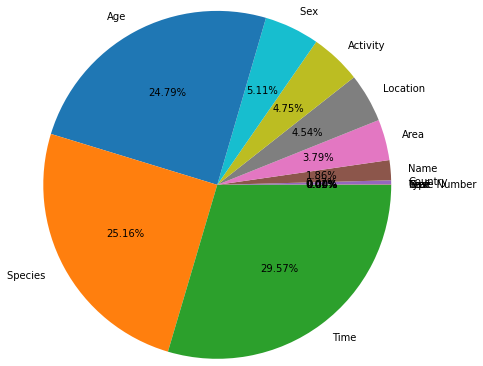

In [151]:
plt.figure()
df_nulos_ordenado = df_nulos.sort_values('cantidad')
plt.pie(df_nulos_ordenado["cantidad"], labels=df_nulos_ordenado["index"] ,autopct="%1.2f%%", radius=2)
plt.show()

**3**. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [136]:
df_ataques.dtypes

case_number     object
year           float64
type            object
country         object
area            object
location        object
activity        object
name            object
sex_            object
age             object
time            object
species_        object
href            object
dtype: object

In [103]:
df_ataques_cat = df_ataques.drop(['year'], axis = 1) #borramos la columna que contiene valores float

In [106]:
df_ataques_cat.columns 

Index(['case_number', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

In [114]:
df_ataques_cat['case_number'].unique().size #probamos este código para una columna

6114

In [129]:
lista_val = []
for i in df_ataques_cat.columns:
    lista_val.append(df_ataques_cat[i].unique().size)
lista_val

[6114, 9, 202, 792, 4021, 1485, 5119, 7, 157, 367, 1530, 6099]

In [137]:
lista_col = []
for col in df_ataques_cat:
    #print(col)
    lista_col.append(col)
lista_col



['case_number',
 'type',
 'country',
 'area',
 'location',
 'activity',
 'name',
 'sex_',
 'age',
 'time',
 'species_',
 'href']

In [141]:
dic = (dict(zip(lista_col, lista_val))) 

{'case_number': 6114,
 'type': 9,
 'country': 202,
 'area': 792,
 'location': 4021,
 'activity': 1485,
 'name': 5119,
 'sex_': 7,
 'age': 157,
 'time': 367,
 'species_': 1530,
 'href': 6099}

In [146]:
df_cat = pd.DataFrame([[key, dic[key]] for key in dic.keys()], columns=['nombre', 'cantidad']) 
df_cat

,nombre,cantidad
0,case_number,6114
1,type,9
2,country,202
3,area,792
4,location,4021
5,activity,1485
6,name,5119
7,sex_,7
8,age,157
9,time,367


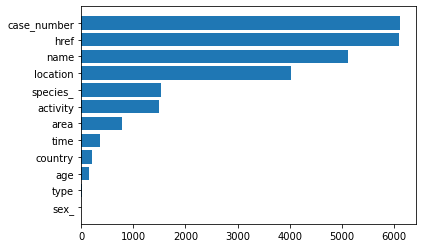

In [149]:
# iniciamos el marco de nuestra figura
plt.figure()

# establecemos como queremos nuestra figura
df_ordenado = df_cat.sort_values('cantidad')
plt.barh('nombre', 'cantidad', data=df_ordenado, color='tab:blue')
plt.show()


In [ ]:
#hasta aquí 

In [100]:
dic1= {}
dic2= {}
dic3= {}
dic4= {}
dic5= {}
dic6= {}
dic7= {}
dic8= {}
dic9= {}
dic10= {}
dic11= {}
dic12= {}
dic13= {}


In [101]:
dic11

{}

In [80]:
df_ataques['case_number'].unique().size

6114

In [82]:
df_ataques.columns

Index(['case_number', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex_', 'age', 'time', 'species_', 'href'],
      dtype='object')

In [102]:
# Con un for vamos añadiendo a los diccionarios las variables y sus valores.
for col in df_ataques.columns:
    if col == 'case_number':
        dic1.setdefault(col, df_ataques['case_number'].unique().size)
    if col == 'year':
        dic2.setdefault(col, df_ataques['year'].unique().size)
        dic2.update(dic1)
    if col == 'type':
        dic3.setdefault(col, df_ataques['type'].unique().size)
        dic2.update(dic3)
    if col == 'country':
        dic4.setdefault(col, df_ataques['country'].unique().size)
        dic3.update(dic4)
    if col == 'area':
        dic5.setdefault(col, df_ataques['area'].unique().size)
        dic4.update(dic5)
    if col == 'location':
        dic6.setdefault(col, df_ataques['location'].unique().size)
        dic5.update(dic6)
    if col == 'activity':
        dic7.setdefault(col, df_ataques['activity'].unique().size)
        dic6.update(dic7)
    if col == 'name':
        dic8.setdefault(col, df_ataques['name'].unique().size)
        dic7.update(dic8)
    if col == 'sex_':
        dic9.setdefault(col, df_ataques['sex_'].unique().size)
        dic8.update(dic9)
    if col == 'age':
        dic12.setdefault(col, df_ataques['age'].unique().size)
        dic9.update(dic10)
    if col == 'time':
        dic10.setdefault(col, df_ataques['time'].unique().size)
        dic10.update(dic11)
    if col == 'species_':
        dic11.setdefault(col, df_ataques['species_'].unique().size)
        dic11.update(dic12)
    if col == 'href':
        dic12.setdefault(col, df_ataques['href'].unique().size)
        

TypeError: update expected at most 1 argument, got 5

In [99]:
dic11

{'species_': 1530, 'age': 157, 'href': 6099}

In [62]:

len(df_ataques['case_number'].unique())


6114

In [72]:
(df_ataques['case_number'].unique()).size #con método de arrays

6114

In [71]:
df_ataques['case_number'].unique()

array(['2018.06.25', '2018.06.18', '2018.06.09', ..., '1803.03.00',
       '1802.04.13.R', '1801.12.18.R'], dtype=object)

In [ ]:
for col in df_ataques.columns:
    if col == 'case_number':
        dicc1.setdefault(col, df_ataques[col].value_counts())
    elif col == 'year':
        dicc2.setdefault(col, df_ataques[col].value_counts())
    elif col == 'type':
        dicc3.setdefault(col, df_ataques[col].value_counts())
    elif col == 'country':
        dicc4.setdefault(col, df_ataques[col].value_counts())
    elif col == 'area':
        dicc5.setdefault(col, df_ataques[col].value_counts())
    elif col == 'location':
        dicc6.setdefault(col, df_ataques[col].value_counts())
    elif col == 'activity':
        dicc7.setdefault(col, df_ataques[col].value_counts())
    elif col == 'name':
        dicc8.setdefault(col, df_ataques[col].value_counts())
    elif col == 'sex_':
        dicc9.setdefault(col, df_ataques[col].value_counts())
    elif col == 'age':
        dicc12.setdefault(col, df_ataques[col].value_counts())
    elif col == 'time':
        dicc10.setdefault(col, df_ataques[col].value_counts())
    elif col == 'species_':
        dicc11.setdefault(col, df_ataques[col].value_counts())
    elif col == 'href':
        dicc12.setdefault(col, df_ataques[col].value_counts())

**4**. Filtrad los datos para quedarnos solo con los datos de USA.
- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

**5.** Filtrad los datos para Spain:

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.
- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.